In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load cleaned dataset

df = pd.read_csv("cleaned_insurance_data.csv")

3. **Analyse univariée :** Analysez chaque variable indépendamment.

- Age

In [3]:
# Descriptive statistics

round(df['age'].describe(), 2)

# Minimum age = 18, Maximum age = 64, Average age = 39, Age standard deviation = ± 14

count    1326.00
mean       39.21
std        14.05
min        18.00
25%        27.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: float64

In [4]:
# Descriptive statistics (Median)

df['age'].median() 

# Median age = 39

np.float64(39.0)

In [5]:
# Descriptive statistics (Mode)

df['age'].mode() 

# The modal ages are 18 and 19, signifying a bimodal distribution 

0    18
1    19
Name: age, dtype: int64

Text(64.72222222222221, 0.5, 'Frequency')

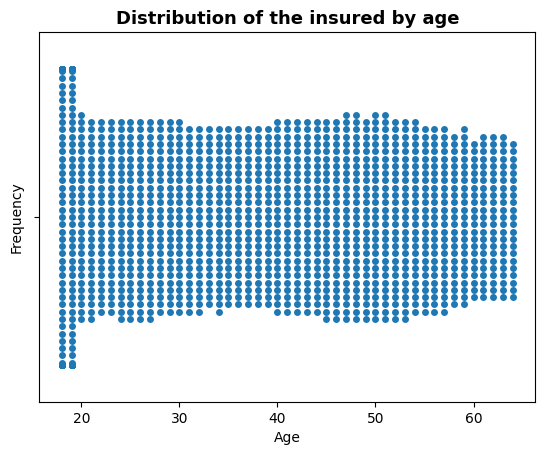

In [6]:
# Confirm bimodality with swarmplot

sns.swarmplot(data=df, x="age")
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Age", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [7]:
# Descriptive statistics (Range)

age_range = df['age'].max() - df['age'].min()

age_range

# Age range of the insured = 46

np.int64(46)

In [8]:
# Descriptive statistics (Co-efficient of Variation)

cov_age = df['age'].std() / df['age'].mean()

cov_age = round(cov_age,2) * 100

cov_age

# The CoV of the ages of the insured is 36%

np.float64(36.0)

- Sex

In [9]:
# Number of males and females insured

number_of_insured_by_sex = df['sex'].value_counts()

number_of_insured_by_sex

# 668 males and 658 females are insured by the company

sex
1    668
0    658
Name: count, dtype: int64

In [10]:
# Create dataframe for pie chart

pie_df = pd.DataFrame(number_of_insured_by_sex).reset_index()
pie_df['sex'] = pie_df['sex'].map({1 : "Male", 0 : "Female"})
pie_df['percentage'] = pie_df['count'] / pie_df['count'].sum() * 100

pie_df

,sex,count,percentage
0,Male,668,50.377074
1,Female,658,49.622926


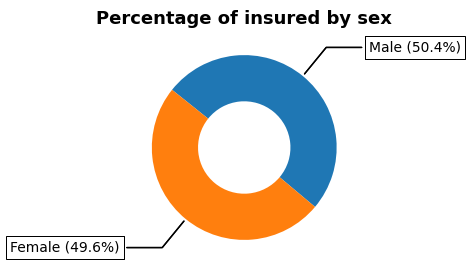

In [11]:
# Pie chart showing the percentage ratio of males to females

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df['count'], wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df['sex'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df['sex'][i]} ({pie_df['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by sex", fontsize=13, weight="bold")

plt.show()

# Males represent 50.4% of the insured while females represent 49.6% of the insured. 

- BMI

In [12]:
# Descriptive statistics

round(df['bmi'].describe(), 2)

# Minimum bmi = 16, Maximum bmi = 47.7, Average bmi = 30.6, bmi standard deviation = ± 6

count    1326.00
mean       30.56
std         5.97
min        15.96
25%        26.22
50%        30.30
75%        34.49
max        47.74
Name: bmi, dtype: float64

In [13]:
# Descriptive statistics (Median)

df['bmi'].median() 

# Median age = 30.3

np.float64(30.3)

In [14]:
# Descriptive statistics (Mode)

df['bmi'].mode() 

# The modal BMI = 32.3, signifying a unimodal distribution 

0    32.3
Name: bmi, dtype: float64

Text(0.6944444444444446, 0.5, 'Frequency')

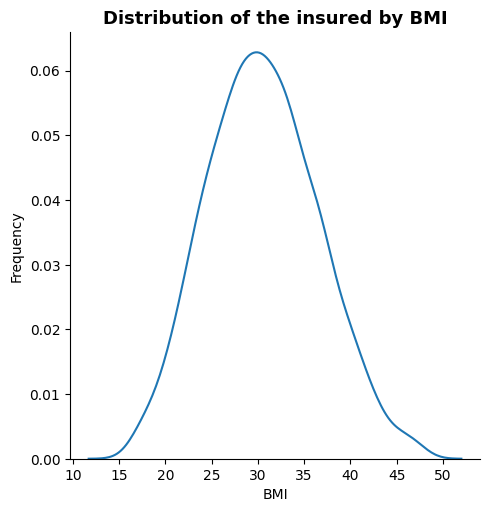

In [15]:
# Confirm mode with plot

sns.displot(df, x = 'bmi', kind='kde')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [16]:
# Descriptive statistics (Range)

bmi_range = df['bmi'].max() - df['bmi'].min()

bmi_range

# BMI range of the insured = 31.78

np.float64(31.78)

In [17]:
# Descriptive statistics (Co-efficient of Variation)

cov_bmi = df['bmi'].std() / df['bmi'].mean()

cov_bmi = round(cov_bmi, 2) * 100

cov_bmi

# The CoV of the BMI of the insured = 20%

np.float64(20.0)

- Children

In [18]:
# Descriptive statistics

round(df['children'].describe(), 2)

# Information on clients' number(s) of children 
# Minimum number of children = 0, Maximum number of children = 5, 
# Average number of children = 1, Number of chimdren standard deviation = ± 1

count    1326.00
mean        1.10
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: float64

In [19]:
# Descriptive statistics (Median)

df['children'].median() 

# Median number of children had by clients = 1

np.float64(1.0)

In [20]:
# Descriptive statistics (Mode)

df['children'].mode() 

# Most of the clients insured have no children
# Mode = 0

0    0
Name: children, dtype: int64

Text(5.069444444444445, 0.5, 'Frequency')

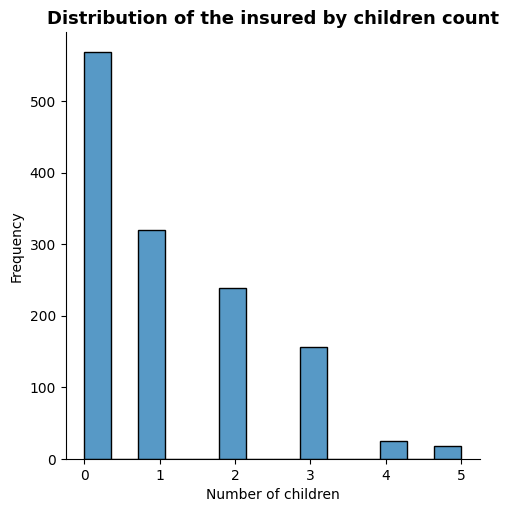

In [21]:
# Confirm mode with plot

sns.displot(df, x = 'children', kind='hist')
plt.title("Distribution of the insured by children count", fontsize= 13, weight = "bold")
plt.xlabel("Number of children", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [22]:
# Descriptive statistics (Range)

children_no_range = df['children'].max() - df['children'].min()

children_no_range

# children_no_range of the insured = 5

np.int64(5)

In [23]:
# Descriptive statistics (Co-efficient of Variation)

cov_children = df['children'].std() / df['children'].mean()

cov_children = round(cov_children, 2) * 100

cov_children

# The CoV of the number of children of the insured = 110%

np.float64(110.00000000000001)

In [24]:
number_of_children_by_insured = df['children'].value_counts()

number_of_children_by_insured

children
0    568
1    320
2    239
3    156
4     25
5     18
Name: count, dtype: int64

In [25]:
# Create dataframe for pie chart

pie_df_children = pd.DataFrame(number_of_children_by_insured).reset_index()
pie_df_children['percentage'] = round(pie_df_children['count'] / pie_df_children['count'].sum() * 100, 2)

shuffled_pie_df_children = pie_df_children.sample(frac=1, random_state=75).reset_index(drop=True)

shuffled_pie_df_children

,children,count,percentage
0,2,239,18.02
1,4,25,1.89
2,1,320,24.13
3,3,156,11.76
4,5,18,1.36
5,0,568,42.84


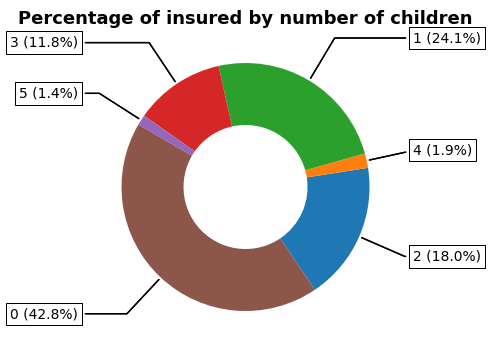

In [26]:
# Pie chart showing the percentage ratio by number of children

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(shuffled_pie_df_children['count'], wedgeprops=dict(width=0.5), startangle=-56)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(shuffled_pie_df_children['children'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{shuffled_pie_df_children['children'][i]} ({shuffled_pie_df_children['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by number of children", fontsize = 13, weight = "bold")

plt.show()

- Smokers

In [27]:
# Number of smokers vs non-smokers insured

number_of_insured_by_smoking_habit = df['smoker'].value_counts()

number_of_insured_by_smoking_habit

# Number of smokers = 1060 
# Number of non-smokers = 255

smoker
0    1060
1     266
Name: count, dtype: int64

In [28]:
# Create dataframe for pie chart

pie_df_smoker = pd.DataFrame(number_of_insured_by_smoking_habit).reset_index()
pie_df_smoker['smoker'] = pie_df_smoker['smoker'].map({ 1 : "Smoker", 0 : "Non-smoker"})
pie_df_smoker['percentage'] = pie_df_smoker['count'] / pie_df_smoker['count'].sum() * 100

pie_df_smoker

,smoker,count,percentage
0,Non-smoker,1060,79.939668
1,Smoker,266,20.060332


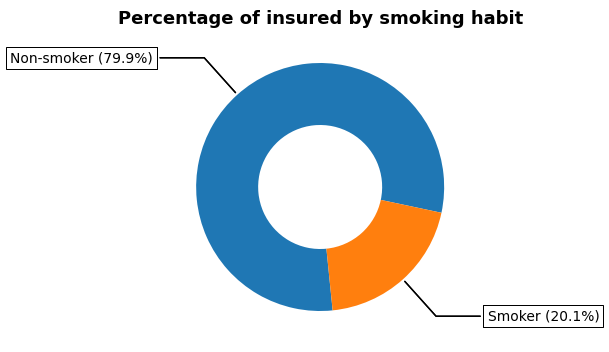

In [29]:
# Pie chart showing the percentage ratio by number of children

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_smoker['count'], wedgeprops=dict(width=0.5), startangle=-12)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_smoker['smoker'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_smoker['smoker'][i]} ({pie_df_smoker['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by smoking habit", fontsize = 13, weight = "bold")

plt.show()

- Region

In [30]:
# Confirm the number of regions in dataset

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [31]:
# Number of smokers vs non-smokers insured

number_of_insured_by_region = df['region'].value_counts()

number_of_insured_by_region

# southeast = 358, southwest = 323, northwest = 323, northeast = 322

region
southeast    358
southwest    323
northwest    323
northeast    322
Name: count, dtype: int64

In [32]:
# Create dataframe for pie chart

pie_df_region = pd.DataFrame(number_of_insured_by_region).reset_index()
pie_df_region['percentage'] = pie_df_region['count'] / pie_df_region['count'].sum() * 100

pie_df_region

,region,count,percentage
0,southeast,358,26.998492
1,southwest,323,24.358974
2,northwest,323,24.358974
3,northeast,322,24.283560


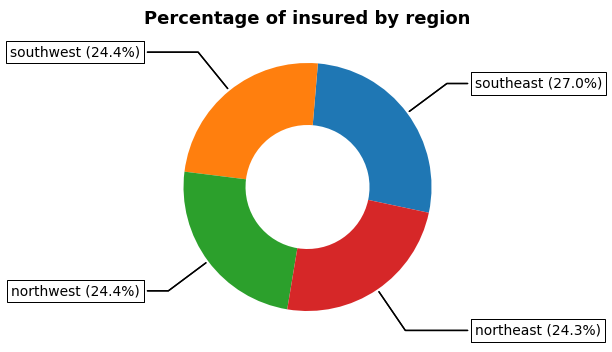

In [33]:
# Pie chart showing the percentage ratio of the insured by region

fig, ax = plt.subplots(figsize=(4, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(pie_df_region['count'], wedgeprops=dict(width=0.5), startangle=-12)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pie_df_region['region'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

    label = f"{pie_df_region['region'][i]} ({pie_df_region['percentage'][i]:.1f}%)"
    ax.annotate(
        label, 
        xy=(x, y), 
        xytext=(1.35 * np.sign(x), 1.4 * y),
        horizontalalignment=horizontalalignment, 
        **kw
    )

ax.set_title("Percentage of insured by region", fontsize = 13, weight = "bold")

plt.show()

- Charge

In [34]:
# Descriptive statistics

round(df['charges'].describe(), 2)

# Minimum charge = 1121.87, Maximum charge = 49577.66, Average charge = 13033.96, Charge standard deviation = ± 11680.81

count     1326.00
mean     13033.96
std      11680.81
min       1121.87
25%       4724.37
50%       9296.02
75%      16389.83
max      49577.66
Name: charges, dtype: float64

In [35]:
# Descriptive statistics (Median)

round(df['charges'].median(), 2)

# Median charge = 9296.02

np.float64(9296.02)

In [36]:
# Descriptive statistics (Mode)

round(df['charges'].mode(), 2)

# Modal charge = 1639.56

0    1639.56
Name: charges, dtype: float64

Text(5.069444444444445, 0.5, 'Frequency')

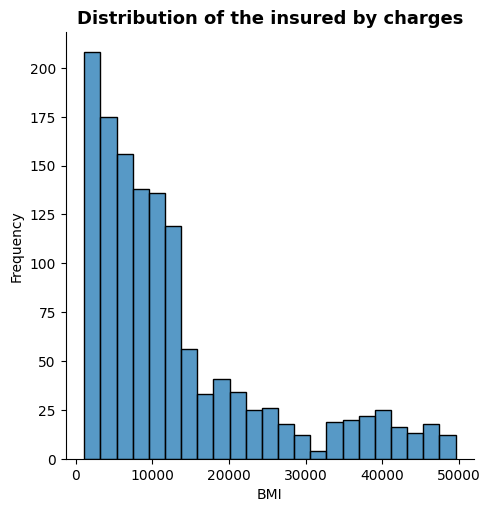

In [37]:
# Confirm mode with plot

sns.displot(df, x = 'charges', kind='hist')
plt.title("Distribution of the insured by charges", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [38]:
# Descriptive statistics (Range)

round(df['charges'].max() - df['charges'].min(), 2)

# Charge range = 48455.79

np.float64(48455.79)

In [39]:
# Descriptive statistics (Co-efficient of Variation)

cov_charges = df['charges'].std() / df['charges'].mean()

cov_charges = round(cov_charges, 2) * 100

cov_charges

# The CoV of the number of children of the insured = 90%

np.float64(90.0)

In [40]:
cov_outputs = [cov_age, cov_bmi, cov_children, cov_charges]

df_cov_plot = pd.DataFrame({"Parameters" : ["Age", "BMI", "Children", "Charges"], "CoV": cov_outputs})

df_cov_plot

,Parameters,CoV
0,Age,36.0
1,BMI,20.0
2,Children,110.0
3,Charges,90.0


Text(0, 0.5, 'CoV (%)')

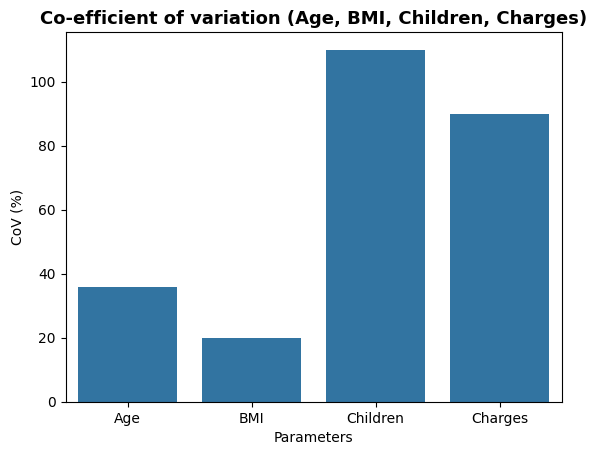

In [41]:
sns.barplot(data=df_cov_plot, x = 'Parameters', y = 'CoV')
plt.title("Co-efficient of variation (Age, BMI, Children, Charges)", fontsize= 13, weight = "bold")
plt.xlabel("Parameters", weight = 10)
plt.ylabel("CoV (%)", weight = 10)

4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.

In [42]:
# Duplicate dataframe

df_for_cor = df.copy()

In [43]:
# Hot encode region column

df_for_cor['is_southwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "southwest" else 0)
df_for_cor['is_southeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "southeast" else 0)
df_for_cor['is_northwest'] = df_for_cor['region'].apply(lambda x: 1 if x == "northwest" else 0)
df_for_cor['is_northeast'] = df_for_cor['region'].apply(lambda x: 1 if x == "northeast" else 0)

In [44]:
# Drop dataframe index

df_for_cor.drop('Unnamed: 0', inplace=True, axis=1)

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,0
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,1
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,0
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,0


In [45]:
# Log-transform charges and age data (positively-skewed)

df_for_cor['charges_log'] = df_for_cor['charges'].apply(lambda x: round(np.log(x + 1), 2))
df_for_cor['age_log'] = df_for_cor['age'].apply(lambda x: round(np.log(x + 1), 2))
df_for_cor['children_log'] = df_for_cor['children'].apply(lambda x: round(np.log(x + 1), 2))

df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast,charges_log,age_log,children_log
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0,9.73,3.00,0.00
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0,7.45,2.94,0.69
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0,8.40,3.37,1.39
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0,10.00,3.53,0.00
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0,8.26,3.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,0,9.27,3.93,1.39
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,1,7.70,2.94,0.00
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,0,7.40,2.94,0.00
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,0,7.61,3.09,0.00


In [46]:
# Standardize BMI data

df_for_cor['bmi_std'] = (df_for_cor['bmi'] - df_for_cor['bmi'].mean())/ df_for_cor['bmi'].std()

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast,charges_log,age_log,children_log,bmi_std
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0,9.73,3.00,0.00,-0.444921
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0,7.45,2.94,0.69,0.537788
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0,8.40,3.37,1.39,0.408881
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0,10.00,3.53,0.00,-1.315465
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0,8.26,3.50,0.00,-0.280857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,0,9.27,3.93,1.39,0.069034
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,1,7.70,2.94,0.00,0.228076
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,0,7.40,2.94,0.00,1.053418
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,0,7.61,3.09,0.00,-0.796487


Text(9.444444444444445, 0.5, 'Frequency')

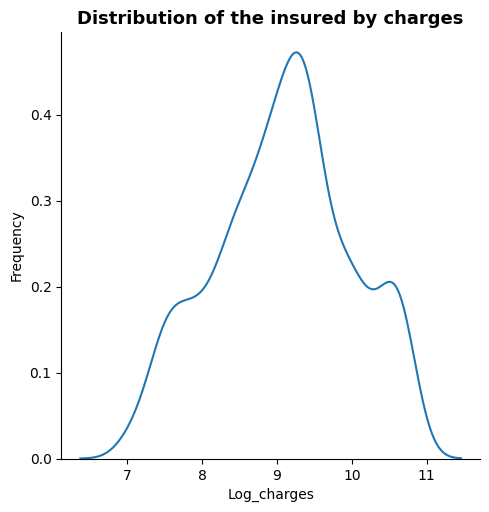

In [47]:
# Review distribution of log_transformed charges data

sns.displot(df_for_cor, x = 'charges_log', kind='kde')
plt.title("Distribution of the insured by charges", fontsize= 13, weight = "bold")
plt.xlabel("Log_charges", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(9.444444444444445, 0.5, 'Frequency')

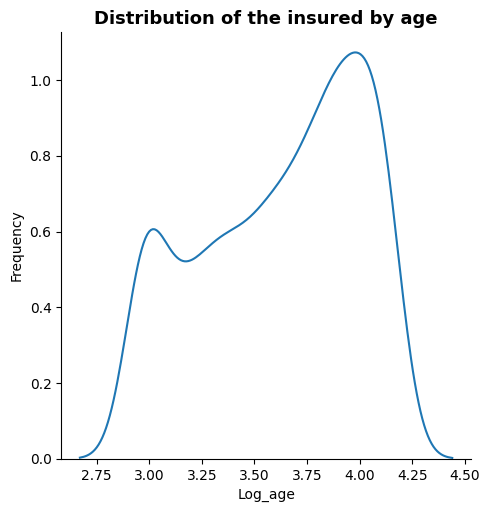

In [48]:
# Review distribution of log_transformed age data

sns.displot(df_for_cor, x = 'age_log', kind='kde')
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Log_age", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(9.444444444444445, 0.5, 'Frequency')

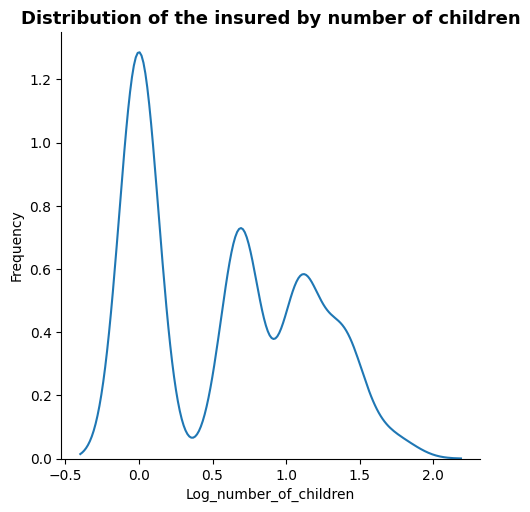

In [52]:
# Review distribution of log_transformed children data

sns.displot(df_for_cor, x = 'children_log', kind='kde')
plt.title("Distribution of the insured by number of children", fontsize= 13, weight = "bold")
plt.xlabel("Log_number_of_children", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(0.6944444444444446, 0.5, 'Frequency')

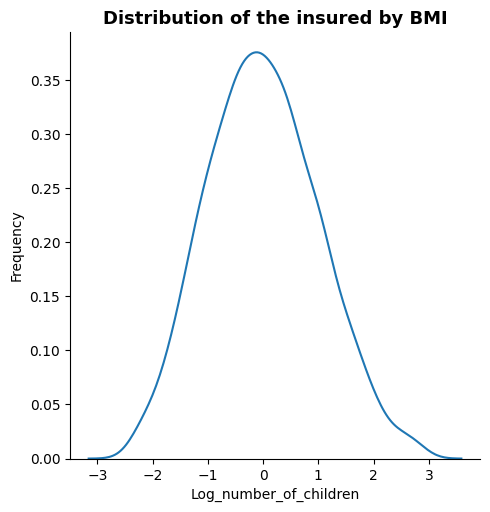

In [54]:
# Review distribution of log_transformed children data

sns.displot(df_for_cor, x = 'bmi_std', kind='kde')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("Log_number_of_children", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [60]:
df_for_cor

,age,sex,bmi,children,smoker,region,charges,is_southwest,is_southeast,is_northwest,is_northeast,charges_log,age_log,children_log,bmi_std
0,19,0,27.90,0,1,southwest,16884.92,1,0,0,0,9.73,3.00,0.00,-0.444921
1,18,1,33.77,1,0,southeast,1725.55,0,1,0,0,7.45,2.94,0.69,0.537788
2,28,1,33.00,3,0,southeast,4449.46,0,1,0,0,8.40,3.37,1.39,0.408881
3,33,1,22.70,0,0,northwest,21984.47,0,0,1,0,10.00,3.53,0.00,-1.315465
4,32,1,28.88,0,0,northwest,3866.86,0,0,1,0,8.26,3.50,0.00,-0.280857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,50,1,30.97,3,0,northwest,10600.55,0,0,1,0,9.27,3.93,1.39,0.069034
1322,18,0,31.92,0,0,northeast,2205.98,0,0,0,1,7.70,2.94,0.00,0.228076
1323,18,0,36.85,0,0,southeast,1629.83,0,1,0,0,7.40,2.94,0.00,1.053418
1324,21,0,25.80,0,0,southwest,2007.94,1,0,0,0,7.61,3.09,0.00,-0.796487


In [ ]:
# Assuming df contains both numerical and binary categorical data
numerical_columns = ['bmi_std', 'age_log', 'children_log', 'charges_log']
binary_columns = ['sex', 'smoker', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']

# Compute Pearson correlations for numerical data
pearson_corr = df_for_cor[numerical_columns].corr()

# Compute Point Biserial correlations for binary vs numerical
from scipy.stats import pointbiserialr

biserial_corr = pd.DataFrame(
    [[pointbiserialr(df_for_cor[cat], df_for_cor[num])[0] for num in numerical_columns] for cat in binary_columns],
    index=binary_columns, columns=numerical_columns
)

# Transpose biserial_corr to append correctly
biserial_corr_t = biserial_corr.T

# Combine numerical vs numerical and binary vs numerical correlations
combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)

# Fill diagonal with 1.0 (self-correlation)
for col in combined_corr.columns:
    if col in combined_corr.index:
        combined_corr.loc[col, col] = 1.0

# Combine numerical vs numerical and binary vs numerical correlations
#combined_corr = pd.concat([pearson_corr, biserial_corr_t], axis=1)
combined_corr = pd.concat([combined_corr, biserial_corr], axis=0)


In [88]:
combined_corr_2 = combined_corr.copy()

In [ ]:
# Generate

binary_corr_matrix = df_for_cor[binary_columns].corr(method='pearson')

binary_corr_matrix_df = pd.DataFrame(binary_corr_matrix)

binary_corr_matrix_df

In [99]:
combined_corr_2.fillna(binary_corr_matrix_df, inplace=True)

,bmi_std,age_log,children_log,charges_log,sex,smoker,is_southwest,is_southeast,is_northwest,is_northeast,sex,smoker,is_southwest,is_southeast,is_northwest,is_northeast
bmi_std,1.000000,0.111124,0.021083,0.131524,0.041907,-0.006905,0.001348,0.261456,-0.132445,-0.139463,NaN,NaN,NaN,NaN,NaN,NaN
age_log,0.111124,1.000000,0.103066,0.538618,-0.019419,-0.025514,0.011953,-0.012438,0.000255,0.000657,NaN,NaN,NaN,NaN,NaN,NaN
children_log,0.021083,0.103066,1.000000,0.177029,0.017260,0.016471,0.014301,-0.013640,0.029411,-0.029636,NaN,NaN,NaN,NaN,NaN,NaN
charges_log,0.131524,0.538618,0.177029,1.000000,0.005520,0.658171,-0.043801,0.017471,-0.019929,0.045708,NaN,NaN,NaN,NaN,NaN,NaN
sex,0.041907,-0.019419,0.017260,0.005520,1.000000,0.075320,-0.006037,0.012401,-0.009551,0.002764,1.000000,0.075320,-0.006037,0.012401,-0.009551,0.002764
smoker,-0.006905,-0.025514,0.016471,0.658171,0.075320,1.000000,-0.038586,0.068653,-0.038586,0.006174,0.075320,1.000000,-0.038586,0.068653,-0.038586,0.006174
is_southwest,0.001348,0.011953,0.014301,-0.043801,-0.006037,-0.038586,1.000000,-0.345108,-0.322034,-0.321375,-0.006037,-0.038586,1.000000,-0.345108,-0.322034,-0.321375
is_southeast,0.261456,-0.012438,-0.013640,0.017471,0.012401,0.068653,-0.345108,1.000000,-0.345108,-0.344401,0.012401,0.068653,-0.345108,1.000000,-0.345108,-0.344401
is_northwest,-0.132445,0.000255,0.029411,-0.019929,-0.009551,-0.038586,-0.322034,-0.345108,1.000000,-0.321375,-0.009551,-0.038586,-0.322034,-0.345108,1.000000,-0.321375
is_northeast,-0.139463,0.000657,-0.029636,0.045708,0.002764,0.006174,-0.321375,-0.344401,-0.321375,1.000000,0.002764,0.006174,-0.321375,-0.344401,-0.321375,1.000000


In [103]:
combined_corr_2.dropna(inplace=True, axis = 1)

In [104]:
combined_corr_2

,bmi_std,age_log,children_log,charges_log,sex,smoker,is_southwest,is_southeast,is_northwest,is_northeast
bmi_std,1.000000,0.111124,0.021083,0.131524,0.041907,-0.006905,0.001348,0.261456,-0.132445,-0.139463
age_log,0.111124,1.000000,0.103066,0.538618,-0.019419,-0.025514,0.011953,-0.012438,0.000255,0.000657
children_log,0.021083,0.103066,1.000000,0.177029,0.017260,0.016471,0.014301,-0.013640,0.029411,-0.029636
charges_log,0.131524,0.538618,0.177029,1.000000,0.005520,0.658171,-0.043801,0.017471,-0.019929,0.045708
sex,0.041907,-0.019419,0.017260,0.005520,1.000000,0.075320,-0.006037,0.012401,-0.009551,0.002764
smoker,-0.006905,-0.025514,0.016471,0.658171,0.075320,1.000000,-0.038586,0.068653,-0.038586,0.006174
is_southwest,0.001348,0.011953,0.014301,-0.043801,-0.006037,-0.038586,1.000000,-0.345108,-0.322034,-0.321375
is_southeast,0.261456,-0.012438,-0.013640,0.017471,0.012401,0.068653,-0.345108,1.000000,-0.345108,-0.344401
is_northwest,-0.132445,0.000255,0.029411,-0.019929,-0.009551,-0.038586,-0.322034,-0.345108,1.000000,-0.321375
is_northeast,-0.139463,0.000657,-0.029636,0.045708,0.002764,0.006174,-0.321375,-0.344401,-0.321375,1.000000


In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(combined_corr, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Correlation Matrix with Mixed Data Types")
plt.show()

In [65]:
# Compute Point Biserial correlation between the log-transformed charges and binary parameters

from scipy.stats import pointbiserialr

bin_cor = []
bin_p_value = []

sex_correlation, sex_p_value = pointbiserialr(df_for_cor['sex'], df_for_cor['charges_log'])
bin_cor.append(sex_correlation)
bin_p_value.append(sex_p_value)
smoker_correlation, smoker_p_value = pointbiserialr(df_for_cor['smoker'], df_for_cor['charges_log'])
bin_cor.append(smoker_correlation)
bin_p_value.append(smoker_p_value)
southwest_correlation, southwest_p_value = pointbiserialr(df_for_cor['is_southwest'], df_for_cor['charges_log'])
bin_cor.append(southwest_correlation)
bin_p_value.append(southwest_p_value)
southeast_correlation, southeast_p_value = pointbiserialr(df_for_cor['is_southeast'], df_for_cor['charges_log'])
bin_cor.append(southeast_correlation)
bin_p_value.append(southeast_p_value)
northwest_correlation, northwest_p_value = pointbiserialr(df_for_cor['is_northwest'], df_for_cor['charges_log'])
bin_cor.append(northwest_correlation)
bin_p_value.append(northwest_p_value)
northeast_correlation, northeast_p_value = pointbiserialr(df_for_cor['is_northeast'], df_for_cor['charges_log'])
bin_cor.append(northeast_correlation)
bin_p_value.append(northeast_p_value)

# print(f"Point Biserial Correlation: {sex_correlation}")
# print(f"P-value: {sex_p_value}")


In [66]:
bin_cor
#bin_p_value

[np.float64(0.005520258657082196),
 np.float64(0.658170893110646),
 np.float64(-0.04380074630197746),
 np.float64(0.01747132728860305),
 np.float64(-0.01992914890759978),
 np.float64(0.045708160222150546)]

In [51]:
# Compute Pearson's correlation between the log-transformed charges and continuous parameters

from scipy.stats import pearsonr

num_cor = []
num_p_value = []

bmi_std_correlation, bmi_std_p_value = pearsonr(df_for_cor['bmi_std'], df_for_cor['charges_log'])
num_cor.append(bmi_std_correlation)
num_p_value
age_log_correlation, age_log_p_value = pearsonr(df_for_cor['age_log'], df_for_cor['charges_log'])
num_cor
num_p_value
children_log_correlation, children_log_p_value = pearsonr(df_for_cor['children_log'], df_for_cor['charges_log'])
num_cor
num_p_value

Pearson's Correlation: 0.16617272778667982
P-value: 1.1452571835939632e-09


Pearson's Correlation: 0.1770287827069207
P-value: 8.491069618461747e-11


5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.
6. **Visualisations graphiques :**
    - Utilisez des box plots ou violin plots (outil : `seaborn`).
7. **Validation des hypothèses :** Utilisez des tests statistiques.
8. **Visualisations :** Appuyez chaque point par des graphiques pertinents.
16977.45